In [ ]:
!pip install selenium

In [1]:
# 예제 6-1 selenium으로 다나와 검색 결과 URL에 접속
from selenium import webdriver

# webdriver 설치 경로 확인
driver = webdriver.Chrome('D:\Python\eAnalysis\cpu_crawling\webdriver\chromedriver.exe') 

url = "http://www.compuzone.co.kr/search/search.htm?Seargbl=1&hidden_Txt=&IsEventSearch=&SearchProductKey=cpu#searchArea"
driver.get(url)


In [2]:
from bs4 import BeautifulSoup

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
cpu_items = soup.select('.product_list>li')
print(len(cpu_items))

In [3]:
# 페이지 긁어오기
import time

page_num = 1
idx = (page_num-1)*20
cpu_list = []

while True:
    print(page_num,idx)
    driver.execute_script("javascript:search_ajax_list('small','cpu','sale_order',20,{},{},0,'4','1012','','undefined',690,19900000,'1327|/|쿨러/튜닝용품|1020|491|/|CPU|1012|228|/|케이스|1147|596|/|커스텀 수랭|1289|6|/|메인보드|1013|6','','','','','','','','','');go_top();".format(idx,page_num))
    time.sleep(0.5)
    html = driver.page_source
    
    soup = BeautifulSoup(html,'html.parser')
    cpu_items = soup.select('.product_list>li')
    print('상품갯수 :', len(cpu_items))
    for cpu_item in cpu_items:
        try:
            title = cpu_item.select('.prd_info_Box .prd_info_name')[0].text
        except:
            title = '상품이름 없음'
        try:
            price = cpu_item.select('.prc_guide_ly strong')[0].text
        except:
            price = 0
        try:
            spec = cpu_item.select('.prd_subTxt>a')[0].text.strip()
        except:
            spec = '알수없음'
        cpu_list.append([title,price,spec])

    if len(soup.select('ul.product_list > li')) == 0:
        break;
    page_num += 1
    idx = (page_num-1)*20
    
    


1 0
상품갯수 : 20
2 20
상품갯수 : 20
3 40
상품갯수 : 20
4 60
상품갯수 : 20
5 80
상품갯수 : 20
6 100
상품갯수 : 20
7 120
상품갯수 : 20
8 140
상품갯수 : 20
9 160
상품갯수 : 20
10 180
상품갯수 : 20
11 200
상품갯수 : 20
12 220
상품갯수 : 9
13 240
상품갯수 : 0


In [8]:
# 데이터 엑셀 저장
import pandas as pd
cpu_data = pd.DataFrame(cpu_list)
cpu_data.columns = ['상품명','가격','스펙']
cpu_data.to_csv('./cpu_data.csv')
cpu_data.to_excel('./cpu_data.xlsx',index=False)
cpu_data['가격'][2]


'332,590'

# 데이터 전처리


In [258]:
import re
cpu_xlsx = pd.read_excel('./cpu_data.xlsx')

number = re.compile(r'\d{4}')
i_product = re.compile(r'i\d')

model_list = []
# 제품 모델명만 불러오기
for i in range(len(cpu_xlsx)):
    for title in cpu_xlsx['상품명'].str.split(' ').iloc[i]:
        if i_product.search(title):
            print(title.split(r'(')[0])
            model_list.append(title.split(r'(')[0])
        elif number.search(title):
            print(title.split(r'(')[0])
            model_list.append(title.split(r'(')[0])

len(model_list)


i3-6100
i7-6700
i3-8100
i7-8700
i3-8100
i3-7100
i9-10920X
G4400
i9-10900X
G4400
6128
6130
6134
6138
6140
6142
6152
4108
4110
3200G
i5-10400
i5-10400F
i3-10100
4650G
4350G
3400G
G6400
G5420
i5-10400F
3600
i7-10700
i5-9400F
G3930
i5-10400
3500
i7-10700
5600X
G6400
i7-10700F
i3-10100
3800XT
i5-10400F
G4930
5800X
3700X
i3-10100
i7-10700K
i7-10700F
i5-9400F
i3-9100F
i5-9400F
i3-10100F
G5905
i3-9100
i7-10700
3300X
i5-10500
i5-10600KF
i7-9700
G5905
i5-9400
i5-9500
i7-9700
i9-10900K
i3-10100F
i5-10400
i5-8500
i7-10700F
i9-10900F
i5-9500
i5-10600K
i7-8700
i7-9700
G5420
G6400
i7-10700K
i7-10700KF
i9-10900
G5420
i5-9600KF
i5-10500
i5-9400
i5-10600KF
G5905
i9-10850K
i9-10900K
i5-9600KF
i5-10600K
G3930
i7-9700F
i5-9400F
i5-8500
G4930
5950X
i9-10900F
i7-9700KF
i7-10700K
i5-10600K
i9-10940X
3950X
3970X
i3-9100F
i3-7100
i9-10980XE
i9-10900KF
i7-10700K
i9-10900
3960X
i7-10700
i9-10900X
i9-9900KF
4210
i5-9600KF
E5-2630
i9-10900
i9-10900F
E-2174G
E-2176G
E-2224
i9-10900K
i5-9500
i9-9900KF
6234
6240
4208


228

In [259]:
import time
from selenium import webdriver
#-------------------------------1. 웹 페이지 접근
# 웹드라이버 객체 생성
driver = webdriver.Chrome('./webdriver/chromedriver')
driver.implicitly_wait(3)
# 페이지 접근
driver.get('https://www.cpubenchmark.net/CPU_mega_page.html')
driver.implicitly_wait(2)
driver.find_element_by_tag_name("select").click()
driver.find_element_by_xpath("//*[@id='cputable_length']/label/select/option[4]").click()
driver.implicitly_wait(2)
result = []
#[확인]
html = driver.page_source
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')
cpu_name = soup.select("td.sorting_1 > a")
cpu_mark = soup.select("#cputable > tbody > tr > td:nth-child(3)")
cpu_thread_mark = soup.select("#cputable > tbody > tr > td:nth-child(4)")
with open('cpu_bench.csv','a',encoding='utf-8')as file:
    for name, mark, thread in zip(cpu_name, cpu_mark, cpu_thread_mark):
        file.writelines("{} , {} , {}\n".format(name.text, mark.text.replace(",", ""), thread.text.replace(",", "")))

In [260]:
idx = 0
# for i in range(len(cpu_data['상품명'])):
#     cpu_data['company'].iloc[i] = cpu_data['상품명'].str.split(']').iloc[i][0][1:]
temp_data = cpu_data

company = []
for i in range(len(temp_data['상품명'])):
      company.append(temp_data['상품명'].str.split(']').iloc[i][0][1:])
temp_data['회사'] = company
temp_data.to_excel('./cpu_data.xlsx',index=False)

# 스펙에서 회사명, nm 뽑아내기
for i in range(len(temp_data)):
    for nm in temp_data['스펙'].str.split('/').iloc[i]:
        if 'nm' in nm:
            print(temp_data['회사'].iloc[i],nm)

# 가격 0원(품절) 제외
# temp_data = cpu_data[cpu_data['가격'] != 0]

# list = temp_data['스펙'].str.split('/').iloc[22]
# print(list)
# for nm in list:
#     if 'nm' in nm:
#         print(nm)
# temp_data

INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
AMD  12nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
AMD  7nm 
AMD  12nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
AMD  7nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
AMD  7nm 
INTEL  14nm 
AMD  7nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
AMD  7nm 
INTEL  14nm 
INTEL  14nm 
AMD  7nm 
AMD  7nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
AMD  7nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
INTEL  14nm 
IN

# 비교 분석

In [261]:
cpu_data = pd.read_excel('./cpu_data.xlsx')
cpu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     228 non-null    object
 1   가격      228 non-null    object
 2   스펙      227 non-null    object
 3   회사      228 non-null    object
dtypes: object(4)
memory usage: 7.2+ KB


# 시각화


In [391]:
cpu_data

number = re.compile(r'\d{4}')
i_product = re.compile(r'i\d')
arrange_data = []

for num in range(len(cpu_data)):
    temp_list = []
    for title in cpu_xlsx['상품명'].str.split(' ').iloc[num]:
        if i_product.search(title):
            print(title.split(r'(')[0])
            temp_list.append(title.split(r'(')[0])
        elif number.search(title):
            print(title.split(r'(')[0])
            temp_list.append(title.split(r'(')[0])
    for nm in temp_data['스펙'].str.split('/').iloc[num]:
        if 'nm' in nm:
            print(cpu_data['회사'].iloc[num])
            print(nm.strip())
            print(float(cpu_data['가격'].iloc[num].replace(",", "")))
            temp_list.append(cpu_data['회사'].iloc[num])
            temp_list.append(nm.strip())
            temp_list.append(float(cpu_data['가격'].iloc[num].replace(",", "")))
    print()
    arrange_data.append(temp_list)   
    

i3-6100
INTEL
14nm
100750.0

i7-6700
INTEL
14nm
326560.0

i3-8100
INTEL
14nm
134000.0

i7-8700
INTEL
14nm
332590.0

i3-8100
INTEL
14nm
135950.0

i3-7100
INTEL
14nm
100450.0

i9-10920X
INTEL
14nm
832000.0

G4400
INTEL
14nm
61500.0

i9-10900X
INTEL
14nm
729700.0

G4400
INTEL
14nm
64500.0

6128
INTEL
14nm
2573000.0

6130
INTEL
14nm
2847000.0

6134
INTEL
14nm
3366000.0

6138
INTEL
14nm
3968000.0

6140
INTEL
14nm
3702000.0

6142
INTEL
14nm
4472000.0

6152
INTEL
14nm
5268690.0

4108
INTEL
14nm
636500.0

4110
INTEL
14nm
770000.0

3200G
AMD
12nm
129000.0

i5-10400
INTEL
14nm
205000.0

i5-10400F
INTEL
14nm
163000.0

i3-10100
INTEL
14nm
127700.0

4650G

4350G
AMD
7nm
166000.0

3400G
AMD
12nm
160000.0

G6400
INTEL
14nm
69000.0

G5420
INTEL
14nm
76500.0

i5-10400F
INTEL
14nm
161000.0

3600
AMD
7nm
202000.0

i7-10700
INTEL
14nm
360000.0

i5-9400F
INTEL
14nm
155700.0

G3930
INTEL
14nm
43800.0

i5-10400
INTEL
14nm
193830.0

3500
AMD
7nm
147000.0

i7-10700
INTEL
14nm
338000.0

5600X
AMD
7nm
415000.0



AttributeError: 'int' object has no attribute 'replace'

In [392]:
arr_cpu = pd.DataFrame(arrange_data, columns=['모델명','회사','nm','가격'])
arr_cpu

,모델명,회사,nm,가격
0,i3-6100,INTEL,14nm,100750.0
1,i7-6700,INTEL,14nm,326560.0
2,i3-8100,INTEL,14nm,134000.0
3,i7-8700,INTEL,14nm,332590.0
4,i3-8100,INTEL,14nm,135950.0
...,...,...,...,...
146,i5-9500F,INTEL,14nm,210000.0
147,i5-9500F,INTEL,14nm,195000.0
148,i7-9700KF,INTEL,14nm,313650.0
149,E3-1230,INTEL,14nm,387600.0


In [426]:
cpu_data = pd.read_excel('./cpu_data.xlsx')
temp_data = cpu_data
nano_list = []
company = []

# for i in range(len(temp_data['상품명'])):
#       company.append(temp_data['상품명'].str.split(']').iloc[i][0][1:])
# temp_data['회사'] = company
# temp_data.to_excel('./cpu_data.xlsx',index=False)
# cpu_data

# 스펙에서 회사명, nm 뽑아내기
# for i in range(len(temp_data)):
#     for nm in cpu_data['스펙'].str.split('/').iloc[i]:
#         if 'nm' in nm:
#             nano_list.append([cpu_data['회사'].iloc[i],nm.strip()])
            
# nano = pd.DataFrame(nano_list, columns=['회사', 'nm'])
# nano


TypeError: 'float' object is not iterable

<AxesSubplot:xlabel='회사'>

C:\Users\kosmo_04\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kosmo_04\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kosmo_04\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\kosmo_04\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)


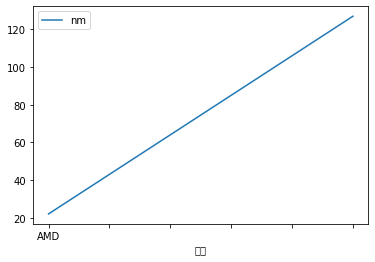

In [415]:
group_nm = pd.DataFrame(arr_cpu['nm'].groupby(arr_cpu['회사']).size())
group_nm.plot()

In [342]:
cpu_bench = pd.read_csv('./cpu_bench.csv',names=['모델명','종합','스레드'])
cpu_bench

,모델명,종합,스레드
0,AMD 3015e,2678,1408
1,AMD 3020e,2652,1488
2,AMD A10 Micro-6700T APU,1291,703
3,AMD A10 PRO-7350B APU,1896,926
4,AMD A10 PRO-7800B APU,3096,1453
...,...,...,...
9076,VIA QuadCore C4650@2.0GHz,1323,557
9077,VIA QuadCore L4700 @ 1.2+ GHz,773,355
9078,VIA QuadCore U4650 @ 1.0+ GHz,666,296
9079,ZHAOXIN KaiXian KX-U6780A@2.7GHz,3744,570


In [407]:
arr_cpu = pd.DataFrame(arrange_data, columns=['모델명','회사','nm','가격'])
cpu_bench = pd.read_csv('./cpu_bench.csv',names=['모델명','성능','성능2'])

# cpu 성능 알아보기 
# for num in range(len(cpu_bench)):
#     for temp_num in range(len(arr_cpu)):
#         if arr_cpu['모델명'][temp_num] in cpu_bench['모델명'][num].strip():
#             print(num,'있음', arr_cpu['모델명'][temp_num])

# 제조사별 가격 평균
intel_list = []
amd_list = []
# for num in range(len(arr_cpu)):
#     print()

company_price = arr_cpu['가격'].groupby(arr_cpu['회사'])
arr_cpu
company_price.size()
company_price.sum()/company_price.size()
# print(company_price.sum()/127)


회사
AMD      2.110540e+06
INTEL    6.558961e+05
Name: 가격, dtype: float64